# Popular Data Science Questions
Our goal in this project is to use [Data Science Stack Exchange](https://datascience.stackexchange.com/) to determine what content should a data science education company create, based on interest by subject.

## Table of Contents
---
- [Stack Exchange](#Stack-Exchange)
- [Stack Exchange Data Explorer](#Stack-Exchange-Data-Explorer)
- [The Posts Table](#The-Posts-Table)
- [Importing Libraries](#Importing-Libraries)
- [Exploring the Data](#Exploring-the-Data)
- [Cleaning the Data](#Cleaning-the-Data)
- [Most Used and Most Viewed](#Most-Used-and-Most-Viewed)
- [Relations Between Tags](#Relations-Between-Tags)
- [Enter Domain Knowledge](#Enter-Domain-Knowledge)
- [Is Deep Learning Just a Fad?](#Is-Deep-Learning-Just-a-Fad?)
- [Conclusions](#Conclusions)

## Stack Exchange
---

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science! Here's a sample of the most popular sites:

![](https://dq-content.s3.amazonaws.com/469/se_sites.png)

Image Source: DataQuest

Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

If you're not familiar with Stack Overflow or any other Stack Exchange site, you can check out [this](https://stackexchange.com/tour) tour.

Being a multidisciplinary field, there a few Stack Exchange websites there are relevant to our goal here:

>* [Data Science](https://datascience.stackexchange.com/)
>*  [Cross Validated](https://stats.stackexchange.com/) — a statistics site
>*  [Artificial Intelligence](https://ai.stackexchange.com/)
>*  [Mathematics](https://math.stackexchange.com/)
>*  [Stack Overflow](https://stackoverflow.com/)

And if we want to include Data Engineering, we can also consider:

>*  [Database Administrators](https://dba.stackexchange.com/)
>*  [Unix & Linux](https://unix.stackexchange.com/)
>*  [Software Engineering](https://softwareengineering.stackexchange.com/)

### What kind of questions are welcome on the data science stack exchange site?
On DSSE's help center's [section on questions](https://datascience.stackexchange.com/help/asking), we can read that we should:

>* Avoid subjective questions.
>* Ask practical questions about Data Science — there are adequate sites for theoretical questions.
>* Ask specific questions.
>* Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to our goal. In the help center we also learned that in addition to the sites mentioned in the Learn section, there are other two sites that are relevant:

>* [Open Data](https://opendata.stackexchange.com/help/on-topic) (Dataset requests)
>* [Computational Science](https://scicomp.stackexchange.com/help/on-topic)| (Software packages and algorithms in applied mathematics)



### What, other than questions, does DSSE's home subdivide into?
On the [home page](https://datascience.stackexchange.com/) we can see that we have four sections:

>* [Questions](https://datascience.stackexchange.com/questions) — a list of all questions asked
>* [Tags](https://datascience.stackexchange.com/tags) — a list of tags (keywords or labels that categorize questions)
![](https://camo.githubusercontent.com/e2a2cb70d1bdc388fbe75352bfddb52ed400973f7544b02f5ec9f4f3b7fd8ec7/68747470733a2f2f64712d636f6e74656e742e73332e616d617a6f6e6177732e636f6d2f3436392f746167735f64732e706e67)
Image Source: Stack Exchange
>* [Users](https://datascience.stackexchange.com/users) — a list of users
>* [Unanswered](https://datascience.stackexchange.com/unanswered) a list of unanswered questions

The tagging system used by Stack Exchange allow us to quantify how many questions are asked about each subject. Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.

### What information is available in each post?
Looking, just as an example, at [this](https://datascience.stackexchange.com/questions/19141/linear-model-to-generate-probability-of-each-possible-output?rq=1) question, some of the information we see is:

>* For both questions and answers:
    * The posts's score
    * The posts's title
    * The posts's author
    * The posts's body
>* For questions only:
    * How many users have starred the question
    * The last time the question as active
    * How many times the question was viewed
    * Related questions
    * The question's tags

## Stack Exchange Data Explorer
---
Stack Exchange provides a public database for each of its websites. We can use [this link](https://data.stackexchange.com/datascience/query/new) to query and explore the Data Science Stack Exchange database for information on posts. It is important to note that the database is designed to be queried with the [Transact-SQL (Microsoft's SQL)](https://docs.microsoft.com/en-us/sql/t-sql/language-reference?view=sql-server-ver16) dialect.

After exploring the database, we found a few tables that seem relevant to our analysis:
>- **Posts:** Contains comprehensive information about posts, including the creation date, tags, number of answers, views and upvotes among many more.
>- **Tags:** Holds information about different tags including the number of times they have been used on the site. However, it does not provide time-series information to help us identify if a tag was popular in the past or present.
>- **PostTags:** Contains information on posts and their tags alone. Similar to the `Tags` table, time series information is absent.
>- **TagSynonyms:** Provides information on tags and alternative names assigned to them by site administrators. Time series information is absent.

Given the absence of time-series information in the `Tags`, `PostTags` and `TagSynonyms` tables, and considering that the `Posts` table already contains the relevant details about tags, we will use the information in the `Posts` table alone.

## The Posts Table
---
The Posts Table has **23 columns**. We will focus only on those that seem relevant to our goal:

> (1.) **Id:** An identification number for each post.<br>
> (2.) **PostTypeId:** An identification number for the type of post. The **eight** unique post types are shown below:<br><br>
![](https://dq-content.s3.amazonaws.com/469/PostTypes.png)
> (3.) **CreationDate:** The date and time of creation of the post.<br>
> (4.) **Score:** The post's score.<br>
> (5.) **ViewCount:** How many times the post was viewed.<br>
> (6.) **Tags:** What tags were used.<br>
> (7.) **AnswerCount:** How many answers the question got (only applicable to question posts).<br>
> (8.) **FavoriteCount:** How many times the question was favored.

We are primarily interested with posts that are questions. Other post types are not relevant at the moment. Before proceeding, we can check how many posts on the site are questions, relative to other posts. 

_**The query below (run on Friday, June 10, 2023):**_

```
       SELECT PostTypes.Name AS post_type,
              COUNT(*) AS num_posts
         FROM Posts
        INNER JOIN PostTypes
           ON Posts.PostTypeId = PostTypes.Id
        GROUP BY PostTypes.Name
        ORDER BY 2 DESC;

```

_**Yields the following result:**_<br><br>

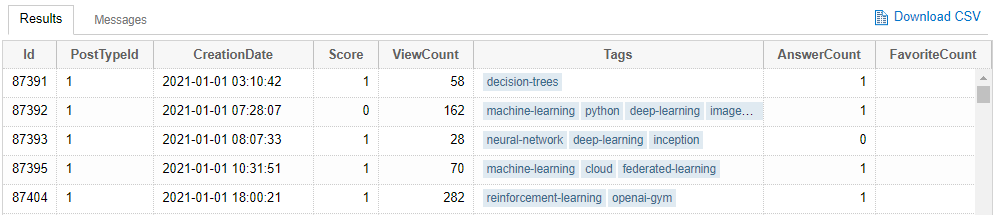


> Due to their low volume, anything that isn't questions or answers is mostly inconsequential. We have **39,049** records as questions. Since we're only interested in recent questions, we will limit our analysis to **question posts from January 2021 till date (February 7th, 2022)**.

## Importing Libraries
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Exploring the Data
___
We can read in the data while immediately making sure `CreationDate` will be stored as a datetime object:

In [2]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

Running questions.info() should gives a lot of useful information.

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


We see that only `FavoriteCount` has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

The types seem adequate for every column, however, after we fill in the missing values on `FavoriteCount`, there is no reason to store the values as floats.

Since the `object` dtype is a catch-all type, let's see what types the objects in `questions["Tags"]` are.

In [4]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

We see that every value in this column is a string. On Stack Exchange, each question can only have a maximum of five tags ([source](https://meta.stackexchange.com/a/18879)), so one way to deal with this column is to create five columns in `questions` called `Tag1`, `Tag2`, `Tag3`, `Tag4`, and `Tag5` and populate the columns with the tags in each row.

However, since doesn't help is relating tags from one question to another, we'll just keep them as a list.

## Cleaning the Data
___
On the previous command, we identified issues with the data. Fortunately for us, the folks at Stack Exchange did a great job of providing clean data. Let's fix the one issue we found, set the appropriate types for the columns, and clean the `Tags` column to fit our purposes.

We'll begin by fixing FavoriteCount.


In [5]:
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

Let's now modify Tags to make it easier to work with.

In [6]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.sample(3)

C:\Users\mskeh\AppData\Local\Temp\ipykernel_14192\803808321.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
1257,57302,2019-08-09 09:46:37,0,54,"[machine-learning, feature-selection, data, 3d...",1,0
1732,57031,2019-08-06 07:11:23,1,62,"[neural-network, deep-learning, cnn]",2,0
8353,54743,2019-06-29 12:52:43,0,14,"[python, keras, gan, object-detection, generat...",0,0


## Most Used and Most Viewed
---
We'll begin by counting how many times each tag was used

In [7]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

For improved aesthetics, let's transform `tag_count` in a dataframe.

In [8]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
machine-learning,2693
data-mining,217
regression,347
linear-regression,175
regularization,50
python,1814
time-series,466
forecast,34
forecasting,85
scikit-learn,540


Let's now sort this dataframe by `Count` and visualize the top 20 results.

In [9]:
most_used = tag_count.sort_values(by="Count").tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


The threshold of `20` is somewhat arbitrary and we can experiment with others, however, popularity of the tags rapidly declines, so looking at these tags should be enough to help us with our goal. Let's visualize these data.

<AxesSubplot:>

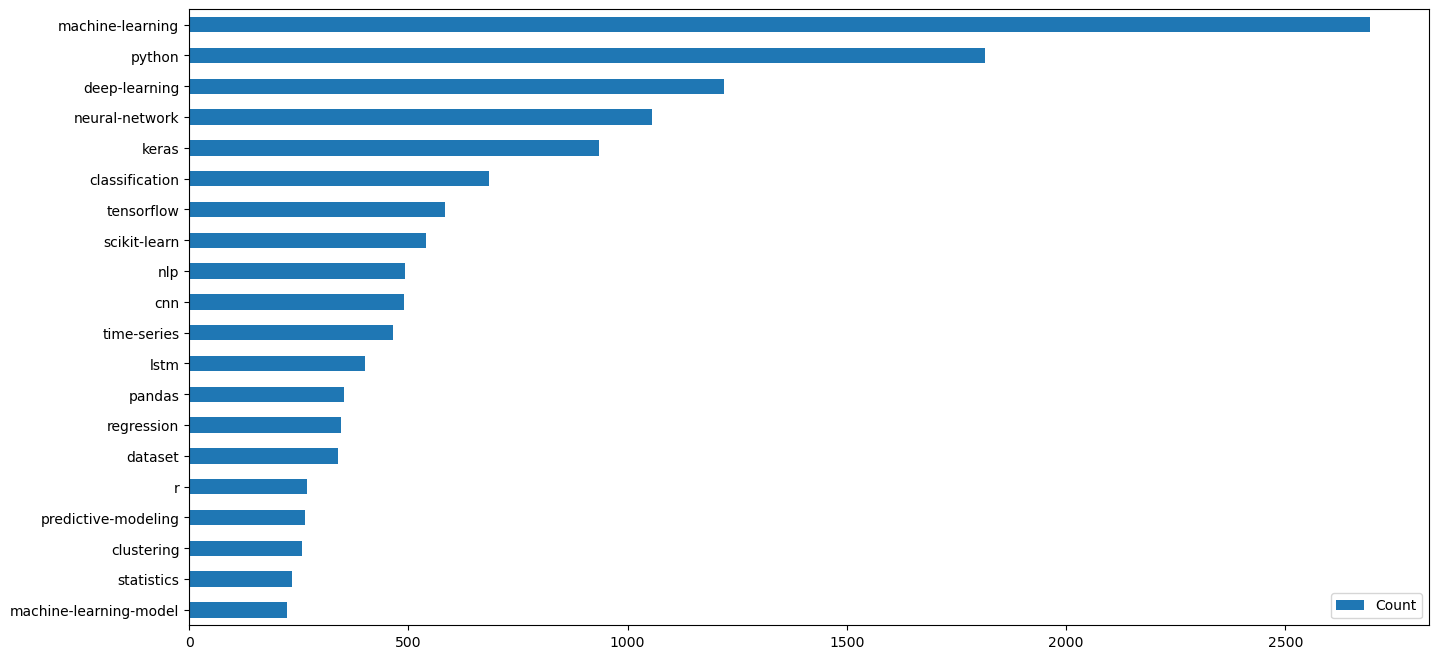

In [10]:
most_used.plot(kind="barh", figsize=(16,8))

Some tags are very, very broad and are unlikely to be useful; e.g.: `python`, `dataset`, `r`. Before we investigate the tags a little deeper, let's repeat the same process for views.

We'll use *pandas's* `pandas.DataFrame.iterrows()`.

<AxesSubplot:>

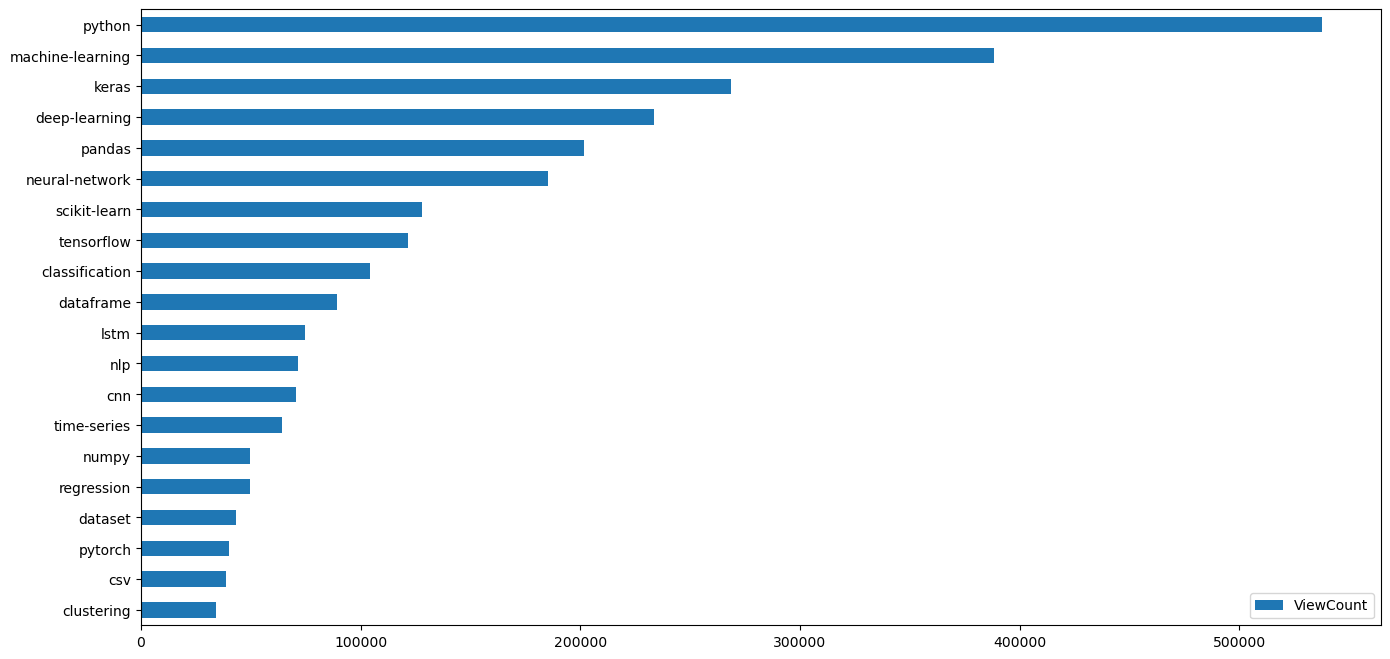

In [11]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))

Let's see them side by side.

array([<AxesSubplot:title={'center':'ViewCount'}>], dtype=object)

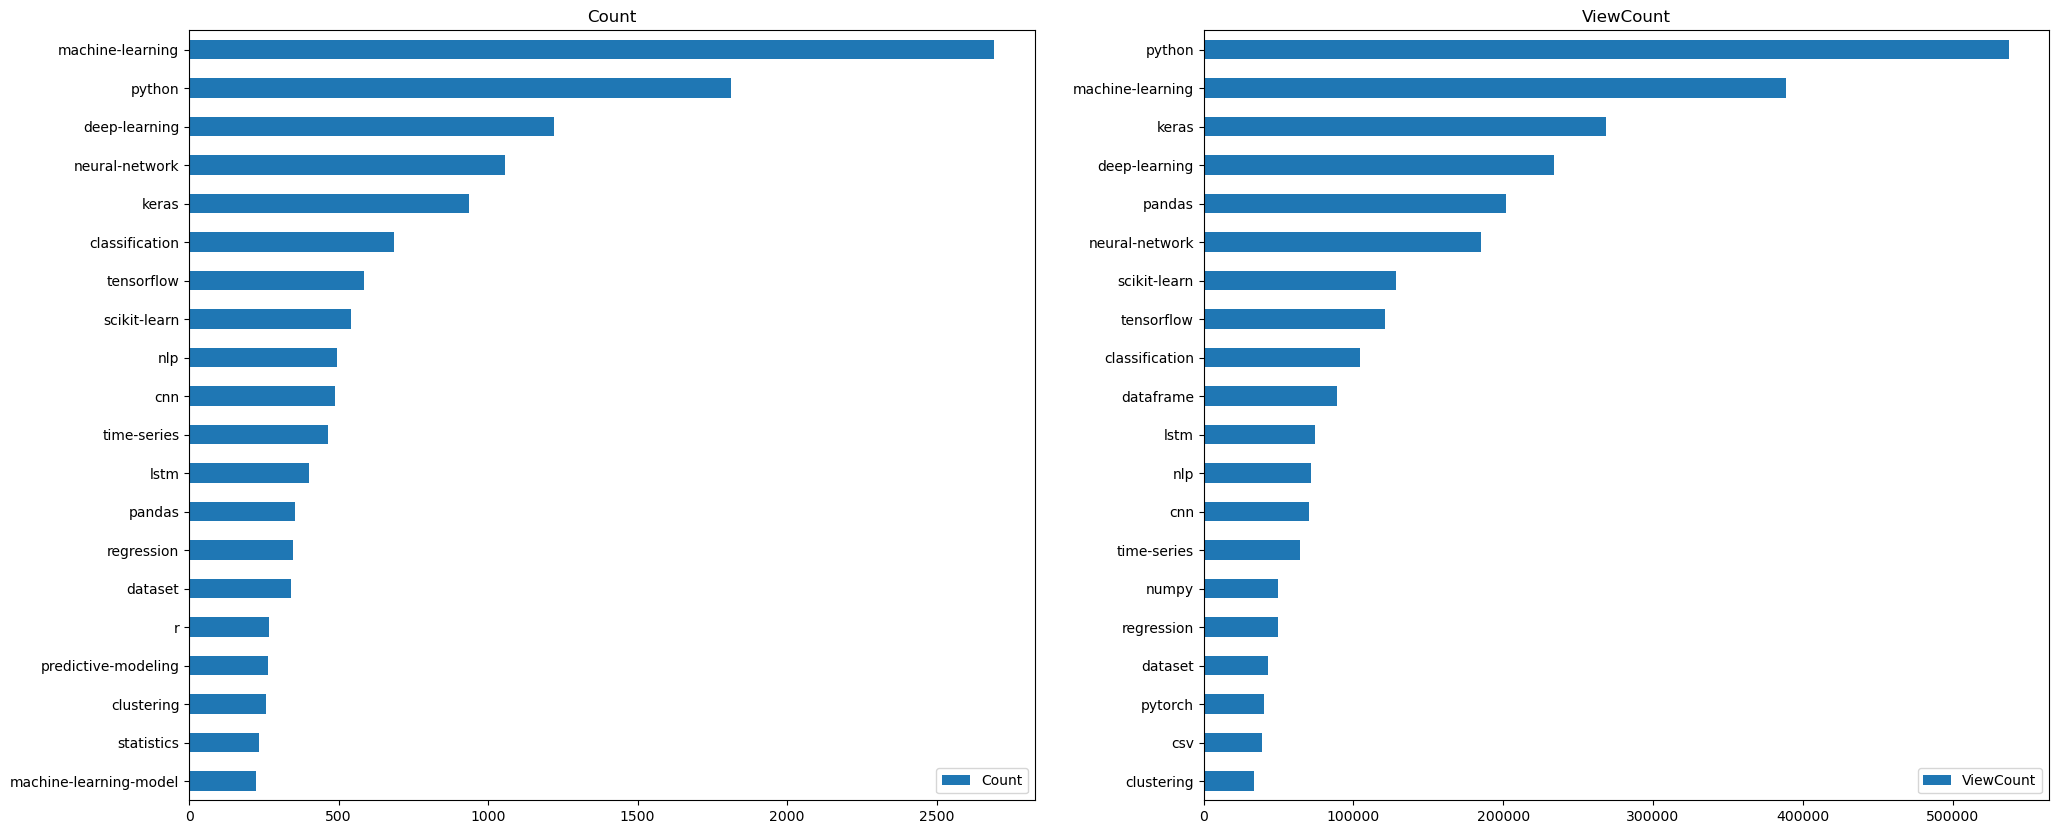

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

In [13]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

## Relations Between Tags
---
One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together. Let's do this by first creating a list of all tags.

In [14]:
all_tags = list(tag_count.index)

We'll now create a dataframe where each row and column will represent a tag.

In [15]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,machine-learning,data-mining,regression,linear-regression
machine-learning,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN
regression,NaN,NaN,NaN,NaN
linear-regression,NaN,NaN,NaN,NaN


We will now fill this dataframe with zeroes and then, for each lists of tags in `questions["Tags"]`, we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [16]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

This dataframe is quite large. Let's focus our attention on the most used tags. We'll add some colors to make it easier to talk about the dataframe.

In [17]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


The cells highlighted in yellow tell us that `time-series` was used together with `r` 22 times. The values in blue tell us how many times each of the tags was used. We saw earlier that `machine-learning` was used 2693 times and we confirm it in this dataframe.

It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.

In [18]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = np.NaN

<AxesSubplot:>

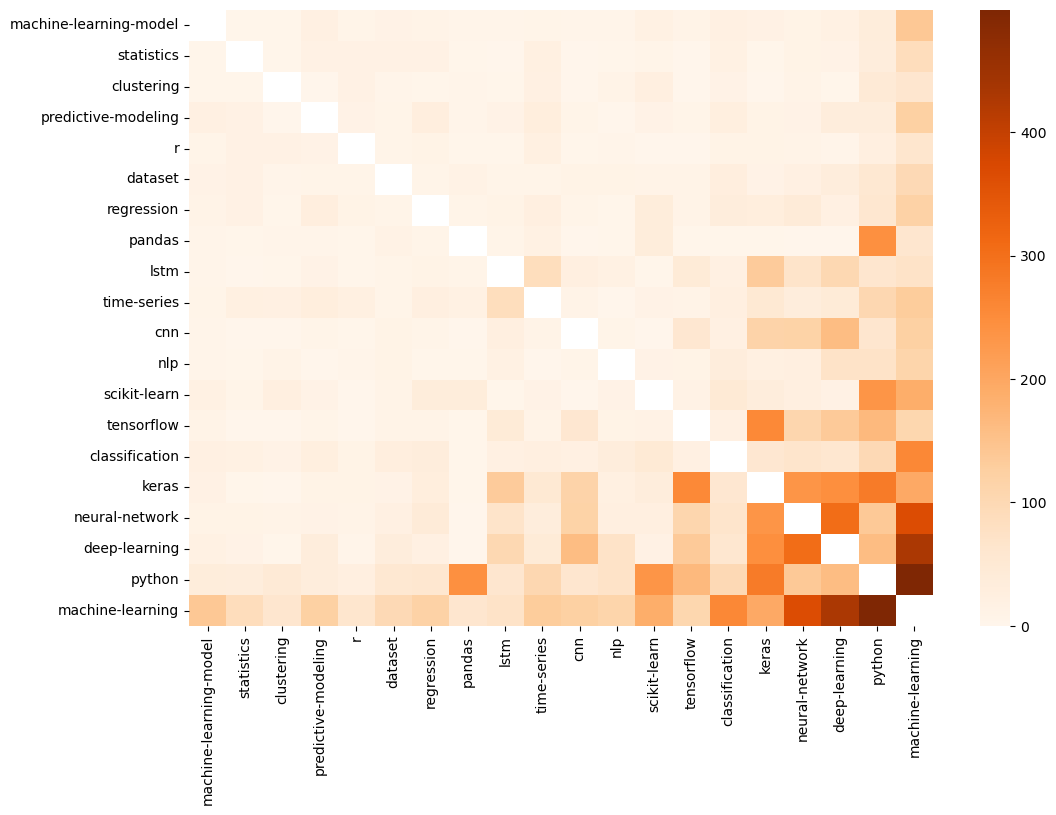

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Oranges", annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, `dataset` and `scikit-learn` have a "strong" relation to `pandas`, but each by itself doesn't.

So how do we attack both these problems? There is a powerful data mining technique that allows us to handle this: [association rules](https://en.wikipedia.org/wiki/Association_rule_learning). Association rules allow us to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, we can also measure how strong this relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship are (toilet paper and bread are probably more independent than eggs and milk — which is the concept of [statistical independence](https://www.sciencedirect.com/topics/engineering/statistical-independence)).

## Enter Domain Knowledge
---
[Keras](https://keras.io/), [scikit-learn](https://scikit-learn.org/), and [TensorFlow](https://www.tensorflow.org/) are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

## Is Deep Learning Just a Fad?
---
Before we communicate our recommendation, it is important to ensure that our findings are backed with proof. Ideally, we want the content we create to be relevant and useful for as long as possible. To ensure this, we need to identify if people's interest in deep learning is increasing overtime or slowing down.

To address this question, we will pull information on all questions from DSSE till date. Relevant information will be the `Id` of the question, the `CreationDate` and the `Tags` used. The query below serves this purpose:
```
        SELECT Id, 
               CreationDate, 
               Tags
          FROM posts
         WHERE PostTypeId = 1
         ORDER BY CreationDate;
```
The output of the query has been stored in a local file named `all_questions.csv`.

In [20]:
# Read and preview the local file
all_questions = pd.read_csv('./all_questions.csv', parse_dates=['CreationDate'])
all_questions.head()

,Id,CreationDate,Tags
0,5,2014-05-13 23:58:30,<machine-learning>
1,7,2014-05-14 00:11:06,<education><open-source>
2,14,2014-05-14 01:25:59,<data-mining><definitions>
3,15,2014-05-14 01:41:23,<databases>
4,16,2014-05-14 01:57:56,<machine-learning><bigdata><libsvm>


Let's read in the file into a dataframe called `all_q`. We'll parse the dates at read-time.

In [21]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

We can use the same technique as before to clean the tags column.

In [22]:
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")

C:\Users\mskeh\AppData\Local\Temp\ipykernel_14192\2212242379.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")


Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list `["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]`.

This list was obtained by looking at all the tags in `most_used` and seeing which ones had any relation to deep learning. You can use Google and read the tags descriptions to reach similar results.

We'll now create a function that assigns `1` to deep learning questions and `0` otherwise; and we use it

In [23]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [24]:
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)

In [25]:
all_q.sample(5)

,Id,CreationDate,Tags,DeepLearning
15460,54398,2019-06-24 15:12:48,[cnn],1
2897,12964,2016-07-24 10:17:35,"[neural-network, tensorflow, rnn]",1
30256,108515,2022-02-25 10:36:41,"[machine-learning, deep-learning, classificati...",1
22847,78492,2020-07-29 13:53:47,"[machine-learning, classification, random-forest]",0
31437,111920,2022-06-17 21:21:44,"[dataset, data-mining, data, research, scraping]",0


The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates:

In [26]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

Let's create a column that identifies the quarter in which a question was asked.

In [27]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [28]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,5,2014-05-13 23:58:30,[machine-learning],0,14Q2
1,7,2014-05-14 00:11:06,"[education, open-source]",0,14Q2
2,14,2014-05-14 01:25:59,"[data-mining, definitions]",0,14Q2
3,15,2014-05-14 01:41:23,[databases],0,14Q2
4,16,2014-05-14 01:57:56,"[machine-learning, bigdata, libsvm]",0,14Q2


For the final stretch of this screen, we'll group by quarter and:

* Count the number of deep learning questions.
* Count the total number of questions.
* Compute the ratio between the two numbers above.

In [29]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
10,16Q4,176,518,0.339768
14,17Q4,349,887,0.393461
22,19Q4,589,1497,0.393454
9,16Q3,159,575,0.276522
1,14Q3,13,188,0.069149


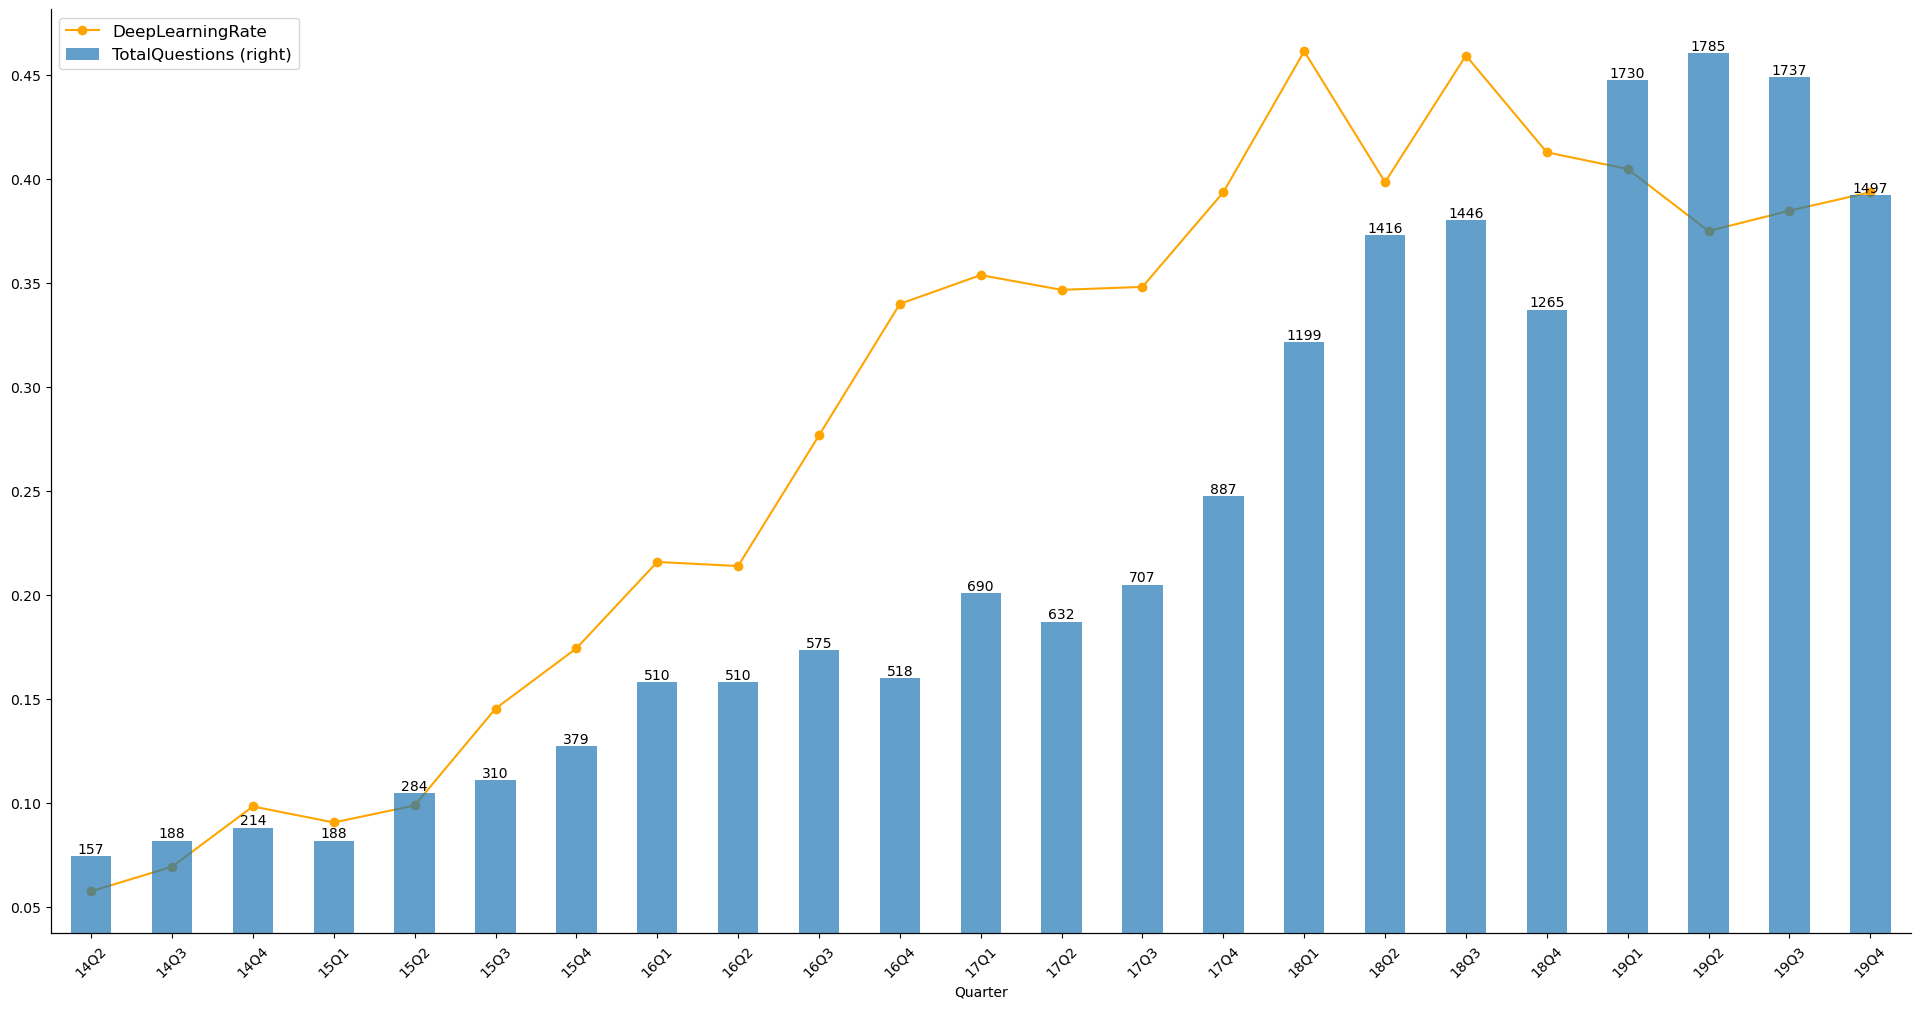

In [30]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

## Conclusions

Throughout this project, we collected, explored and analyzed data from the Data Science Stack Exchange (DSSE) Database. Our goal was to identify the most popular Data science topic and then use the insight to develop content that our audience will engage with and love.

Analysis showed machine learning, python and deep learning as the most popular data science topics. However, due to the broad nature of the earlier two options, we decided to focus on the relatively narrower alternative - deep learning.

Interestingly, deep learning has grown in popularity on DSSE, rising from over 5% of total DSSE questions in 2014 to over 30% in 2016. Deep learning still accounts for over 30% of questions posted on DSSE to date, signifying that the topic is not just a fad. Instead, it is a growing field of data science that people continue to engage and explore over the long term.
